In [93]:
import numpy as np 
import pandas as pd

In [94]:
df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

In [95]:
print(df.shape)
df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [96]:
print(regions_df.shape)
regions_df.head()

(230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [97]:
# We are going to do for Summer Olympics!! (The dataset is bigger as compared with the winter ones, for now, later we will include both or do seperate analysis..) 

In [98]:
df = df[df['Season'] == 'Summer']
df.shape

(222552, 15)

In [99]:
# We can make out the country/region from NOC..

In [100]:
df = df.merge(regions_df, on = 'NOC', how = 'inner')

In [101]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [102]:
# Number of countries participated ..
print(f'The number of countries participated is: {df['region'].nunique()}')

The number of countries participated is: 205


In [103]:
# Check for missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9177
Height     51769
Weight     53764
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188124
region        21
notes     217802
dtype: int64

In [104]:
# Check for duplicate values
df.duplicated().sum()


np.int64(1385)

In [105]:
# Remove the duplicates by simply dropping them..
df = df.drop_duplicates()
df.shape

(220818, 17)

In [106]:
df.duplicated().sum()

np.int64(0)

### Medal Tally

In [107]:
# Medals distribution
df['Medal'].value_counts()

Medal
Gold      11455
Bronze    11405
Silver    11208
Name: count, dtype: int64

In [108]:
# Simple One Hot Encoding
pd.get_dummies(df['Medal'], dtype = int) # dtype was used since i was getting the values as boolean!

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222198,0,0,0
222199,0,0,0
222200,0,0,0
222201,0,0,0


In [109]:
# Now, we will add this to the original dataset
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype=int)], axis = 1)

In [110]:
# Medal Tally -> We will add the columns, by NOC 
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
224,WIF,0,0,5
225,YEM,0,0,0
226,YAR,0,0,0
227,YMD,0,0,0


In [111]:
# Now, we are getting too many extra values for medals,it does not match with the original one!! That is bcuz here, even if a team wins a medal, the medals are being counted for each and every player!

In [112]:
# We can handle this by dropping the duplicate values based on a few columns..
medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [113]:
print(medal_tally.shape)
medal_tally.head()

(105397, 20)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [114]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

In [115]:
# Let's check for India, they have won 9 Gold, 7 Silver and 12 Bronze
medal_tally[medal_tally['region'] == 'India']

,region,Gold,Silver,Bronze
47,India,9,7,12


In [116]:
# Total medals
medal_tally['Total Medals'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [117]:
medal_tally

,region,Gold,Silver,Bronze,Total Medals
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Vanuatu,0,0,0,0
201,"Virgin Islands, British",0,0,0,0
202,"Virgin Islands, US",0,1,0,1
203,Yemen,0,0,0,0


In [118]:
# Now, we want to create so,e dropwdowns... like Year, Country..

In [119]:
# Year
years = df['Year'].unique().tolist()
years.sort()

In [120]:
years.insert(0, 'Overall')

In [121]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [122]:
country = np.unique(df['region'].dropna().values).tolist()

In [123]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [124]:
country.insert(0, 'Overall')

In [125]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [126]:
# We will be creating a function which will cater to specific conditions

In [127]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    if flag == 1:
        medals = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:


        medals = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()
    medals['Total'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

    print(medals)

In [128]:
# Let's try here all the cases

In [129]:
# Case 1
# fetch_medal_tally(df = medal_df , year='Overall', country='Overall')

In [130]:
# Case 2
# fetch_medal_tally(df = medal_df, year='Overall', country='India')

In [131]:
# Case 3
# fetch_medal_tally(df = medal_df, year=2012, country='Overall')

In [132]:
# Case 4
# fetch_medal_tally(df = medal_df, year=1900, country='India')

### Overall Analysis
1. Number of editions
2. Number of cities
3. Number of events/sports
4. Number of athletes
5. Participating nations

In [133]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222199,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222200,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222201,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [134]:
# 1. Number of editions
num_of_editions = df['Year'].nunique()
# One year olympics is not counted due to some reasons
print(f'The number of editions is: {num_of_editions - 1}')

The number of editions is: 28


In [135]:
# 2. Number of cities
num_of_cities = df['City'].nunique()
print(f'The number of cities in which the Olympics has been held is: {num_of_cities}')

The number of cities in which the Olympics has been held is: 23


In [136]:
# 3. Number of events/sports
num_of_events = df['Event'].nunique()
print(f'The number of events that has taken place in the Olympics is: {num_of_events}')

num_of_sports = df['Games'].nunique()
print(f'The number of sports that has been a part of the Olympics is: {num_of_sports}')

The number of events that has taken place in the Olympics is: 651
The number of sports that has been a part of the Olympics is: 29


In [137]:
# 4. Number of athletes
num_of_athletes = df['Name'].nunique()
print(f'The number of athletes who have participated in the Olympics is: {num_of_athletes}')

The number of athletes who have participated in the Olympics is: 115956


In [138]:
# Participating nations
num_of_nations = df['region'].nunique()
print(f'The number of participating nations is: {num_of_nations}')

The number of participating nations is: 205


### Visualizations

In [139]:
# Number of participating nations over time

In [140]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [141]:
nations_over_time = df.drop_duplicates(['region', 'Year'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'count' : 'Number of countries', 'Year' : 'Edition'}, inplace=True)

In [142]:
nations_over_time

,Edition,Number of countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [143]:
import matplotlib.pyplot as plt

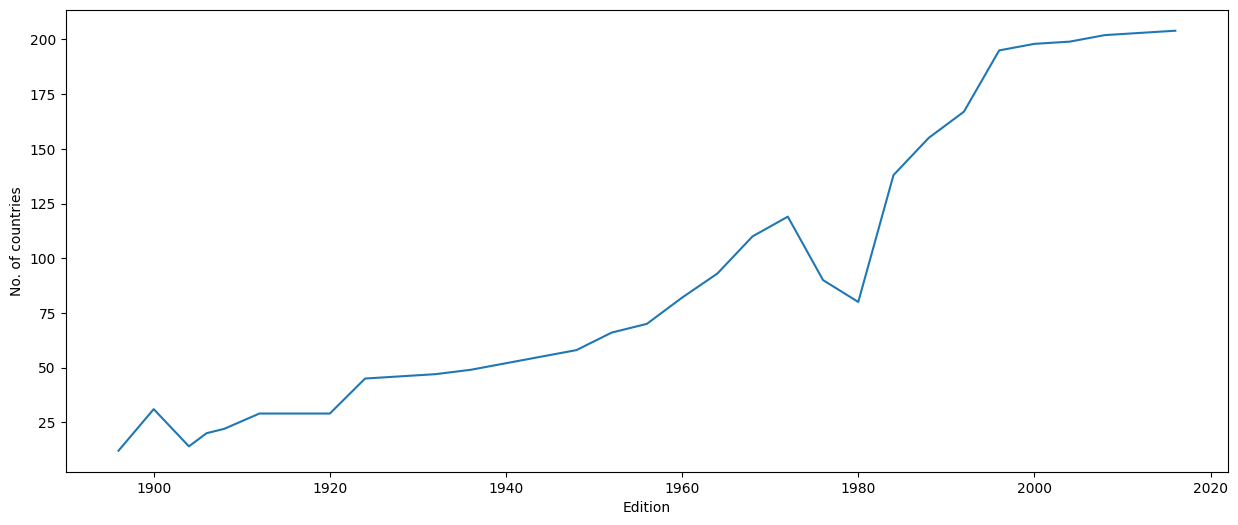

In [144]:
plt.figure(figsize=(15,6))
plt.plot(nations_over_time['Edition'], nations_over_time['Number of countries'])
plt.xlabel('Edition')
plt.ylabel('No. of countries')
plt.show()

In [145]:
# If we want a more interactive graph, we can use Plotly..
import plotly.express as px

In [146]:
fig = px.line(nations_over_time, x = 'Edition', y = 'Number of countries')
fig.show()

In [147]:
# Number of events over time

In [148]:
events_over_time = df.drop_duplicates(['Event', 'Year'])['Year'].value_counts().reset_index().sort_values('Year')
events_over_time.rename(columns={'count' : 'Number of events', 'Year' : 'Edition'}, inplace=True)

In [149]:
events_over_time

,Edition,Number of events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [150]:
fig = px.line(events_over_time, x = 'Edition', y = 'Number of events')
fig.show()

In [151]:
# Number of athletes over time

In [152]:
athletes_over_time = df.drop_duplicates(['Name', 'Year'])['Year'].value_counts().reset_index().sort_values('Year')
athletes_over_time.rename(columns={'count' : 'Number of athletes', 'Year' : 'Edition'}, inplace=True)

In [153]:
athletes_over_time

,Edition,Number of athletes
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


In [154]:
fig = px.line(athletes_over_time, x = 'Edition', y = 'Number of athletes')
fig.show()

In [155]:
# Number of events over editions sports-wise (We will be using a heatmap)

In [156]:
import seaborn as sns

In [157]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

<Axes: xlabel='Year', ylabel='Sport'>

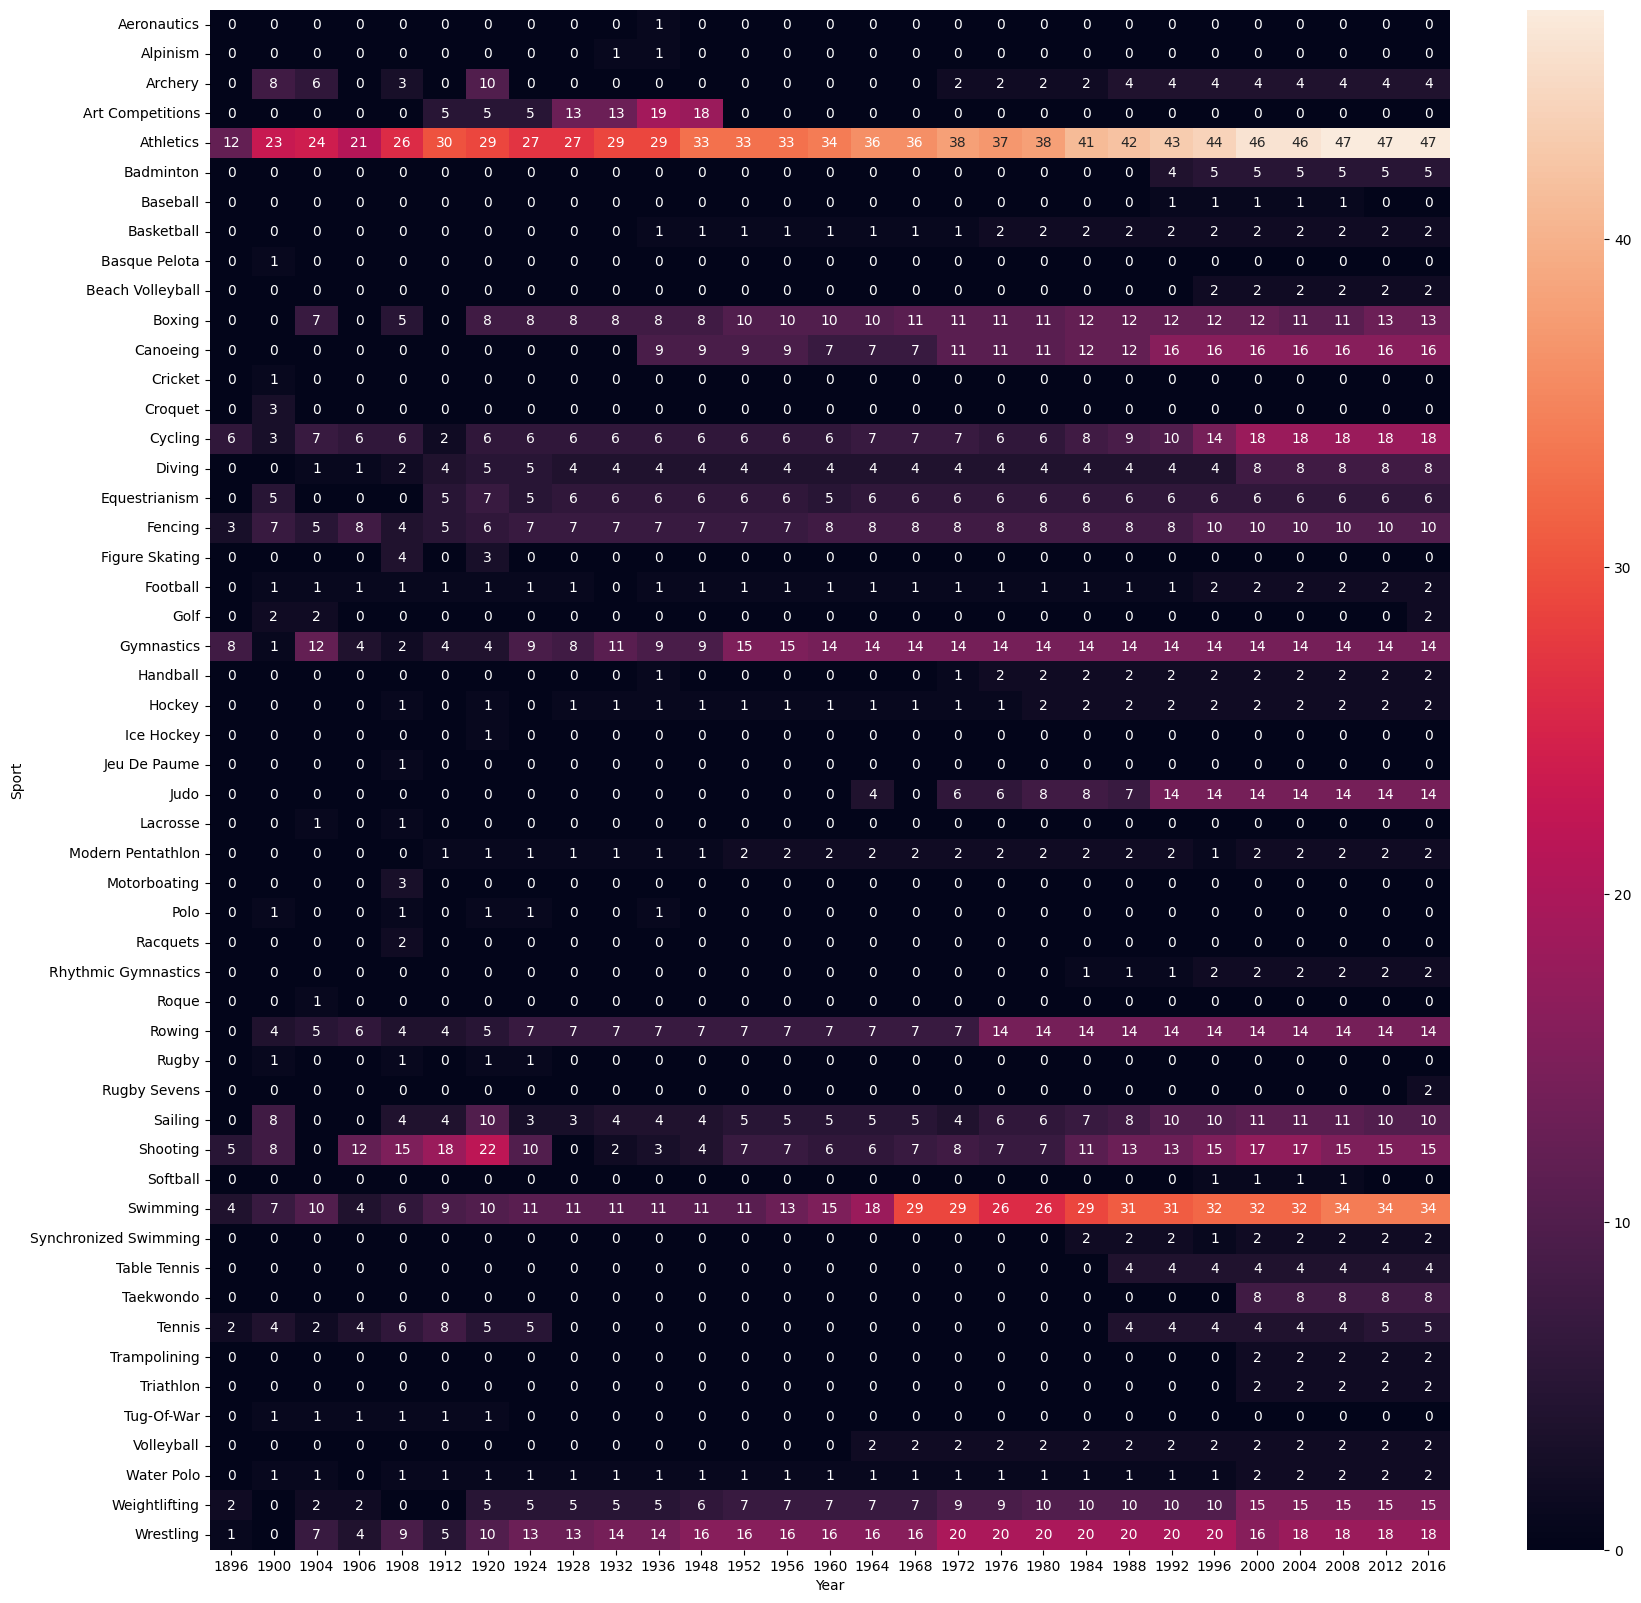

In [158]:
plt.figure(figsize = (20,20))
sns.heatmap(x.pivot_table(index = 'Sport', columns = 'Year', values = 'Event', aggfunc = 'count').fillna(0).astype('int'), annot = True)

In [159]:
# Successful athletes

In [160]:
def most_successful(df, sport):
    temp_df = df.dropna(subset= ['Medal']) # We do not want the athletes with no medals..

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # return temp_df['Name'].value_counts().reset_index().merge(df)[['Name', 'count', 'Sport', 'region']].drop_duplicates() # Here it was unable to give for specific sports properly, showed for same athlete in different sports too!
    x = temp_df['Name'].value_counts().reset_index().merge(df, on = 'Name', how = 'left')[['Name', 'count', 'Sport', 'region']].drop_duplicates() # Getting the same problem as above here too! 2/2/25 - Will complete the project for now, then try to find the solution to this!
    x.rename(columns = {'count' : 'Medals'}, inplace = True)
    return x

In [161]:
most_successful(df, 'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
...,...,...,...,...
63061,Anton Zwerina,1,Weightlifting,Austria
63062,"Klaas Erik ""Klaas-Erik"" Zwering",1,Swimming,Netherlands
63065,Martin Zwicker,1,Hockey,Germany
63066,Viktor Valeryevich Zuyev,1,Boxing,Belarus


### Country-wise Analysis
1. Medal tally per year (Line chart)
2. What sports a country is better at? (Heatmap)
3. Most successful athletes (Top 10)

In [162]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222199,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222200,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222201,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [163]:
# 1. Medal tally 
temp_df = df.dropna(subset=['Medal'])

In [164]:
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Year', 'Sport', 'Event', 'City', 'Medal'], inplace=True)

In [165]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [166]:
fig = px.line(final_df, x = 'Year', y = 'Medal')
fig.show()

In [167]:
# 2. Good in sports..
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Year', 'Sport', 'Event', 'City', 'Medal'], inplace=True)

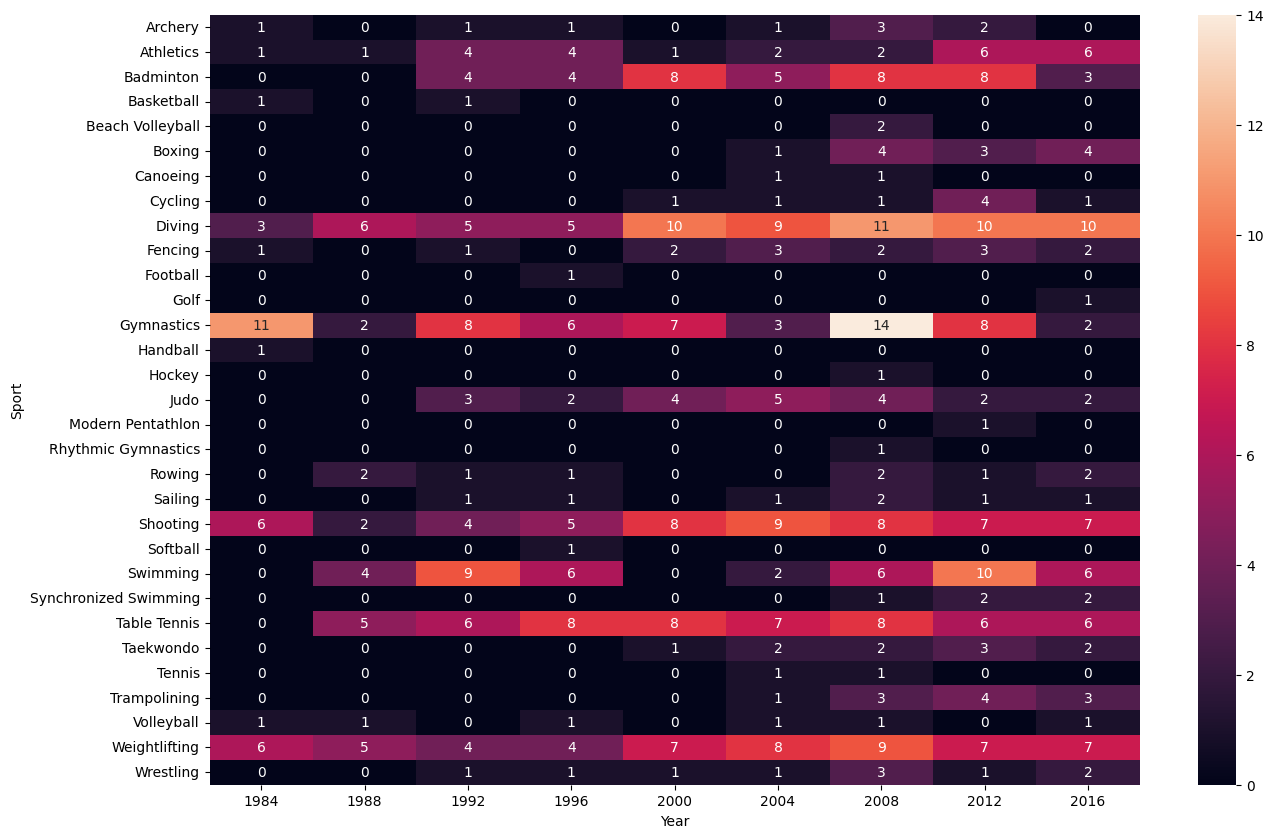

In [168]:
new_df = temp_df[temp_df['region'] == 'China']
plt.figure(figsize = (15,10))
x = sns.heatmap(new_df.pivot_table(index = 'Sport', columns = 'Year', values = 'Medal', aggfunc = 'count').fillna(0), annot = True)

In [169]:
# 3. Country's top 10 athletes

In [170]:
def most_successful_athlete(df, country):
    temp_df = df.dropna(subset= ['Medal']) # We do not want the athletes with no medals..

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, on = 'Name', how = 'left')[['Name', 'count', 'Sport']].drop_duplicates()
    x.rename(columns = {'count' : 'Medals'}, inplace = True)
    return x

In [171]:
most_successful_athlete(df, 'China')

,Name,Medals,Sport
0,Wu Minxia,7,Diving
7,Yang Wei,7,Badminton
10,Yang Wei,7,Gymnastics
33,Zou Kai,6,Gymnastics
41,Wang Yifu,6,Shooting
51,Li Xiaoshuang,6,Gymnastics
67,Li Ning,6,Gymnastics
83,Sun Yang,6,Swimming
93,Wang Hao,6,Table Tennis
99,Wang Hao,6,Athletics


### Athlete-wise Analysis

In [172]:
import plotly.figure_factory as ff

In [173]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [174]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [175]:
athlete_df['Age'].dropna()

0         24.0
1         23.0
2         24.0
3         34.0
4         18.0
          ... 
222195    19.0
222197    23.0
222199    21.0
222200    24.0
222202    33.0
Name: Age, Length: 110574, dtype: float64

In [176]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [177]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Nedalist'], show_hist=False, show_rug=False)
fig.show()

In [88]:
athlete_df['Medal'].fillna('No Medal', inplace = True)

<Axes: xlabel='Weight', ylabel='Height'>

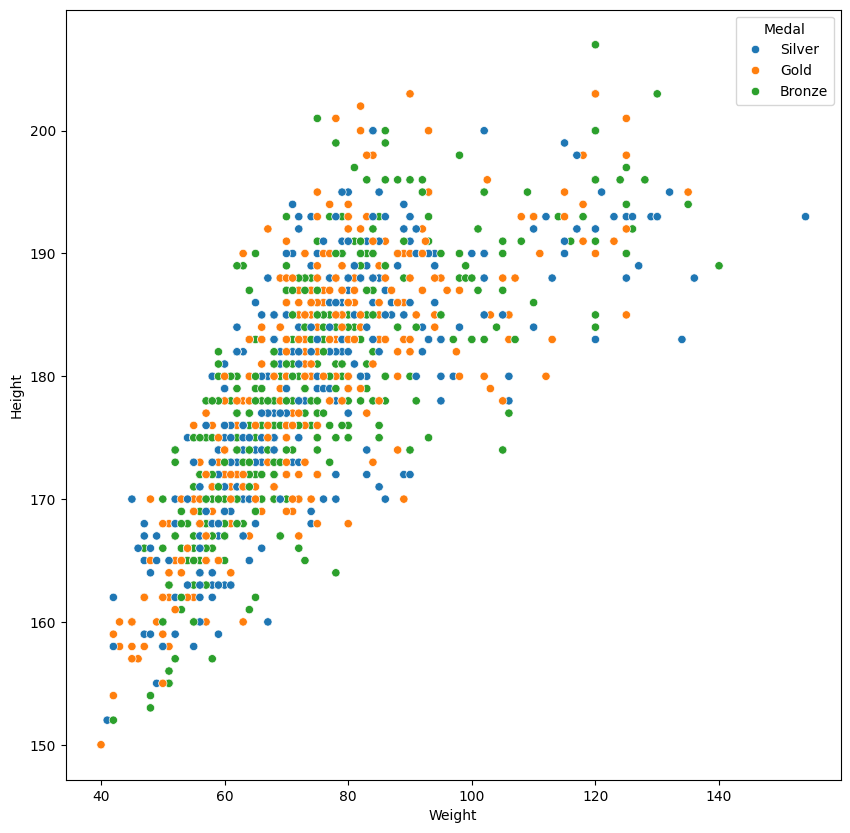

In [179]:
plt.figure(figsize = (10,10)) 
scatter_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x = 'Weight', y = 'Height', hue = 'Medal', data = scatter_df)

In [180]:
# Male vs Female participation 

In [190]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
men

,Year,Name
0,1896,174
1,1900,1181
2,1904,629
3,1906,759
4,1908,1772
5,1912,1978
6,1920,2280
7,1924,2535
8,1928,2342
9,1932,1382


In [192]:
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
women

,Year,Name
0,1900,23
1,1904,6
2,1906,6
3,1908,44
4,1912,53
5,1920,73
6,1924,132
7,1928,285
8,1932,162
9,1936,316


In [197]:
final = men.merge(women, on = 'Year')
final.rename(columns={'Name_x' : 'Male', 'Name_y' : 'Female'}, inplace=True)

In [198]:
final

,Year,Male,Female
0,1900,1181,23
1,1904,629,6
2,1906,759,6
3,1908,1772,44
4,1912,1978,53
5,1920,2280,73
6,1924,2535,132
7,1928,2342,285
8,1932,1382,162
9,1936,3539,316


In [199]:
final.fillna(0, inplace=True)

In [200]:
fig = px.line(final, x = 'Year', y = ['Male', 'Female'])
fig.show()